In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc


In [288]:
# Volum
V = 6 * 8 * 8 # In meters
sim_n = 5000
N_A = sc.constants.Avogadro # Avogadro constant
N = 4 * N_A # The number of molecules
molar_v = (V * N_A / N) * np.ones((sim_n,)) + np.random.normal(0, 20, sim_n)
R = sc.constants.R   # universtal gas constant
b = 10
a = 50
T = np.arange(500, 1000,0.1) + np.random.normal(0, 5, sim_n) # Temp
p_ideal = (sc.constants.R * T) / molar_v
p_vdw = ((sc.constants.R * T) / (molar_v - b)) - (a / (molar_v**2))
p_vdw_noisy = p_vdw + np.random.normal(0, 0.6, len(p_vdw))
input = {'molar_v': molar_v, 'T': T}

In [289]:
error = p_vdw - p_vdw_noisy
np.sum(error**2)/sim_n

0.3541903704422003

In [290]:
molar_v[0]

115.62858969150248

Text(0, 0.5, 'Pressure')

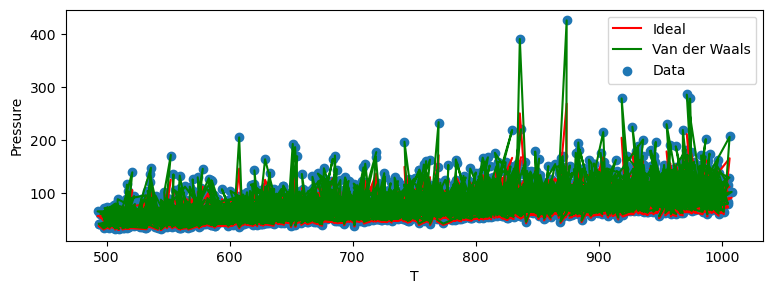

In [291]:
plt.figure(figsize=(9,3))
plt.plot(T, p_ideal, 'r', label='Ideal')
plt.plot(T, p_vdw, 'g', label='Van der Waals')
plt.scatter(T, p_vdw_noisy, label='Data')
plt.legend()
plt.xlabel('T')
plt.ylabel('Pressure')

In [293]:
from scipy.optimize import curve_fit
def idealGas(input, a_):
    return a_ * input['T'] / input['molar_v']

def vdw(input, a_, b_, c_):
    return ((a_ * input['T']) / (input['molar_v'] + b_)) + (c_ / (input['molar_v']**2))

def linear(input, a_, b_):
    return a_ * input['T'] + b_ * input['molar_v']

def cube(input, a_, b_, c_, d_, e_, f_):
    return (a_ * input['T'] + f_) / (d_ * input['molar_v'] + b_) + c_ / (input['molar_v']**2) + e_ / (input['molar_v']**3)

def fract(input, a_, b_, c_, d_, e_):
    return (a_ * input['molar_v']) / (d_ * input['T'] + b_) + c_ / (input['molar_v']**2) + e_ * input['T']

def vdw_linearT(input, a_, b_, c_, d_, e_):
    return (a_ * input['T']) / (d_ * input['molar_v'] + b_) + c_ / (input['molar_v']**2) + e_ * input['T']

def idealGas2(input, a_, b_):
    return a_ * input['T'] / input['molar_v'] + b_ * input['T']

def idealGas3(input, a_, b_, d_):
    return (a_ * input['T'] + d_) / input['molar_v'] + b_ * input['T']

func_dict = {'idealGas' : (idealGas, 1),
             'vdw' : (vdw, 3),
             'linear' : (linear, 2),
             'fract' : (fract, 5),
             'ideaGas2' : (idealGas2, 2),
             'idealGas3' : (idealGas3, 3)}



IndentationError: unindent does not match any outer indentation level (<string>, line 10)

In [294]:
loss = np.inf
chosen = ''
lam = 0.000
popt_save = 0

for key in func_dict:
    f, n_param = func_dict[key]
    p0 = [sc.constants.R]
    for i in range(n_param-1):
        p0.append(1)
    popt, pcov = curve_fit(f, input, p_vdw_noisy, method='lm', p0=p0)

    e = p_vdw_noisy - f(input, *popt)
    tmp_loss = np.sum(e**2)/sim_n + lam * n_param
    print(f'for {key}, the param is \n {popt} \n and loss is {tmp_loss}')
    if tmp_loss < loss:
        loss = tmp_loss
        print(tmp_loss)
        print(key)
        chosen = key
        popt_save = popt
        

for idealGas, the param is 
 [9.51380949] 
 and loss is 16.786007195956394
16.786007195956394
idealGas
for vdw, the param is 
 [   8.31729516  -10.01748153 -411.11145937] 
 and loss is 0.3540682293405338
0.3540682293405338
vdw
for linear, the param is 
 [ 0.17140847 -0.55469263] 
 and loss is 294.0576749534432
for fract, the param is 
 [ 2.57610782e+06 -8.90415098e+06  2.04162784e+05  3.66019538e+03
  1.22615506e-01] 
 and loss is 16.580518456488715
for ideaGas2, the param is 
 [11.18024502 -0.01928971] 
 and loss is 4.66605762560333
for idealGas3, the param is 
 [11.19183612 -0.01928907 -9.06413986] 
 and loss is 4.665685897260519


In [170]:
popt, pcov = curve_fit(idealGas, input, p_vdw_noisy)
print(popt)
print(pcov)

[10.05708234]
[[0.00067349]]


In [76]:
values, pcov, sth, sth2, sth3 = curve_fit(vdw, input, p_vdw_noisy, method='lm', full_output=True)

print(f'values are {values}')

values are [1.90317640e+08 1.64216999e+03 1.88105210e+02 2.54081286e+00]


Text(0, 0.5, 'Pressure')

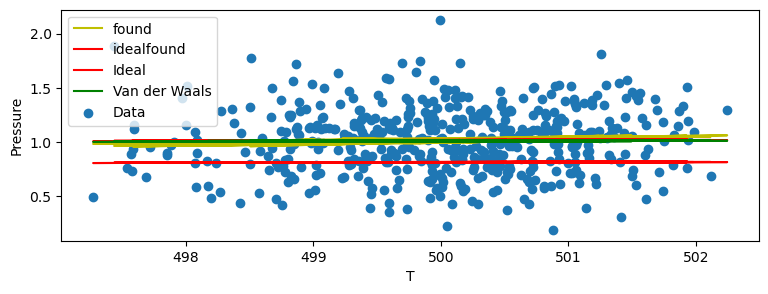

In [77]:
plt.figure(figsize=(9,3))
plt.plot(input['T'], vdw(input, *values), 'y', label='found')
plt.plot(T, idealGas(input, *popt), 'r-', label='idealfound')
plt.plot(T, p_ideal, 'r', label='Ideal')
plt.plot(T, p_vdw, 'g', label='Van der Waals')
plt.scatter(T, p_vdw_noisy, label='Data')
plt.legend()
plt.xlabel('T')
plt.ylabel('Pressure')

In [85]:
error = p_vdw_noisy - func_dict['vdw'][0](input, *values)

TypeError: vdw() takes 4 positional arguments but 5 were given

In [79]:
np.sum(error**2)

44.251565227787225

In [80]:
error_ideal = p_vdw_noisy - idealGas(input, *popt)
np.sum(error_ideal**2)

44.41923750172781

In [ ]:
func_library = {'f1': (idealGas,1), 'f2': (vdw, 4),}